In [630]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt

In [631]:
# Constant Values
IMAGE_HIGHT = 193
IMAGE_WITDH = 162
IMAGE_SIZE = IMAGE_HIGHT * IMAGE_WITDH
DATA_NUM = 171

In [1221]:
def normalize_array(arr):
    scaled_array = ((arr - arr.min()) / (arr.max() - arr.min())) 
    scaled_array = scaled_array / np.linalg.norm(scaled_array)
    return scaled_array

In [704]:
data_path = "./eigenface_dataset/upload_dataset/"
files = os.listdir(data_path)

neutral = []
smile = []

for file in files:
    file_path = os.path.join(data_path, file)
    img = Image.open(file_path)
    arr = np.asarray(img).reshape((-1))
    
    arr = normalize_array(arr)
    
    if "a" in file:
        neutral.append(arr)
    elif "b" in file:
        smile.append(arr)
    
neutral = np.array(neutral).transpose().astype(np.float32)
smile = np.array(smile).transpose().astype(np.float32)

In [705]:
def show_face(arr):
    scaled_array = ((arr - arr.min()) / (arr.max() - arr.min())) * 255
    img = Image.fromarray(scaled_array.astype(np.uint8).reshape(IMAGE_HIGHT, IMAGE_WITDH))
    return img

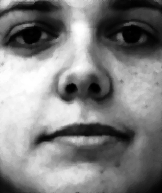

In [706]:
show_face(neutral[:, 1])

# Neutral Eigen Faces

In [1180]:
face_num = 100
indexs = np.random.choice(list(range(neutral.shape[1])), face_num, replace=False)


In [1181]:
def get_norm_face(neutral, indexs):
    rd_neutral_faces = neutral[:, indexs].astype(np.float32) # / 255
    mean_face = np.mean(rd_neutral_faces, axis=1)
    print(mean_face.shape)
    norm_face = rd_neutral_faces - mean_face[:, np.newaxis]
    Image.fromarray((mean_face * 255).astype(np.uint8).reshape(IMAGE_HIGHT, IMAGE_WITDH))
    return norm_face, mean_face

In [1182]:
def my_SVD(norm_face, top=100):
    AHA = np.dot(norm_face.T, norm_face) # / face_num
    print(norm_face.shape)
    eigenvalues, eigenvectors = np.linalg.eig(AHA)
    top_indices = np.argsort(-eigenvalues)[:top]
    U = []
    Sigma = []
    V = []

    for i in range(len(top_indices)):
        v = eigenvectors[:, top_indices[i]]
       
        sigma = np.sqrt(eigenvalues[top_indices[i]])
        u = norm_face @ v / sigma
        
        # print(np.linalg.norm(u))
        
        U.append(u)
        Sigma.append(sigma)
        V.append(v)

    U = np.array(U)
    Sigma = np.array(Sigma)
    V = np.array(V)
    
    return U, Sigma, V

In [1183]:
n_norm_face, n_mean_face = get_norm_face(neutral, indexs)
n_U, n_Sigma, n_V = my_SVD(n_norm_face)

for i in range(n_U.shape[0]):
    eigen_face = show_face(n_U[i])
    eigen_face.save(f"./1_neutral_eigen_face/face_{i}.png")

(31266,)
(31266, 100)


C:\Users\Keter\AppData\Local\Temp\ipykernel_6920\955539258.py:13: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.sqrt(eigenvalues[top_indices[i]])
C:\Users\Keter\AppData\Local\Temp\ipykernel_6920\2700209120.py:3: RuntimeWarning: invalid value encountered in cast
  img = Image.fromarray(scaled_array.astype(np.uint8).reshape(IMAGE_HIGHT, IMAGE_WITDH))


In [1124]:
n_Sigma

array([1.1250502 , 0.75045264, 0.68724203, 0.6482194 , 0.6252458 ,
       0.5147907 , 0.50429505, 0.47006634, 0.4296036 , 0.42158934,
       0.39330965, 0.3856273 , 0.3768894 , 0.35200238, 0.30924246,
       0.30085558, 0.2943883 , 0.29064053, 0.2760282 , 0.26187697,
       0.2564817 , 0.2539356 , 0.24397929, 0.23845819, 0.23342417,
       0.22196656, 0.21791753, 0.21028782, 0.20787068, 0.20510875,
       0.20105992, 0.19013047, 0.18641073, 0.18551928, 0.18314745,
       0.18061595, 0.17868023, 0.16895437, 0.16860352, 0.16686791,
       0.16261439, 0.16140825, 0.1570066 , 0.15612364, 0.15389527,
       0.15122634, 0.14828293, 0.1445281 , 0.14355192, 0.14320683,
       0.13937637, 0.13548376, 0.1344584 , 0.1336649 , 0.13018277,
       0.1292149 , 0.1282819 , 0.12701093, 0.12381975, 0.12108788,
       0.11982197, 0.11801419, 0.11754502, 0.11372592, 0.11187051,
       0.11105452, 0.11004435, 0.1066774 , 0.10558886, 0.10467265,
       0.10389926, 0.10300174, 0.10199862, 0.09856487, 0.09829

# Smile Eigen Faces

In [1184]:
s_norm_face, s_mean_face = get_norm_face(smile, indexs)
s_U, s_Sigma, s_V = my_SVD(s_norm_face)

for i in range(s_U.shape[0]):
    eigen_face = show_face(s_U[i])
    eigen_face.save(f"./1_smile_eigen_face/face_{i}.png")

(31266,)
(31266, 100)


C:\Users\Keter\AppData\Local\Temp\ipykernel_6920\955539258.py:13: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.sqrt(eigenvalues[top_indices[i]])
C:\Users\Keter\AppData\Local\Temp\ipykernel_6920\2700209120.py:3: RuntimeWarning: invalid value encountered in cast
  img = Image.fromarray(scaled_array.astype(np.uint8).reshape(IMAGE_HIGHT, IMAGE_WITDH))


In [1122]:
s_Sigma

array([1.2420841 , 0.80018413, 0.7518273 , 0.6853645 , 0.6647938 ,
       0.5933684 , 0.57627046, 0.5285536 , 0.4921055 , 0.46967337,
       0.4626476 , 0.4247552 , 0.39737368, 0.39266112, 0.3816451 ,
       0.3717768 , 0.34233406, 0.33761194, 0.31509328, 0.3116992 ,
       0.30590963, 0.29634893, 0.28864196, 0.28280768, 0.27202076,
       0.26853135, 0.25636724, 0.24638318, 0.24143438, 0.23876417,
       0.2331919 , 0.23042   , 0.22180416, 0.22092026, 0.21751465,
       0.21564671, 0.21266316, 0.20420076, 0.20084338, 0.19792007,
       0.19511606, 0.19181465, 0.1883344 , 0.18641903, 0.18437655,
       0.1814545 , 0.17939289, 0.17823064, 0.17603998, 0.17023732,
       0.1699371 , 0.16770902, 0.16594023, 0.16371483, 0.16061851,
       0.1587444 , 0.15681387, 0.15371294, 0.15090328, 0.14937054,
       0.14661261, 0.14600417, 0.1417171 , 0.13862108, 0.13663705,
       0.1352499 , 0.13426277, 0.13170558, 0.13029568, 0.12787943,
       0.12670383, 0.12508887, 0.12273987, 0.12112144, 0.12057

In [1025]:
s_Sigma.shape

(100,)

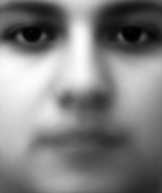

In [1026]:
show_face(n_mean_face)

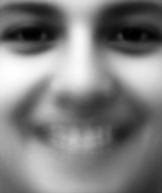

In [1027]:
show_face(s_mean_face)

# Reconstruct Neutral Face with differnt k

In [1028]:
def projection(eigen_face, face, mean_face):
    return eigen_face.T @ (face - mean_face)

In [1029]:
def reconstruct(face, eigen_faces, mean_face, k=10):
    reconstruct_face = np.zeros((IMAGE_SIZE))
    for i in range(k):
        eigen_face = eigen_faces[i,:].reshape((-1))
        weight = projection(eigen_face, face, mean_face)
        reconstruct_face += weight * eigen_face
    
    # reconstruct_face = normalize_array(reconstruct_face)
    reconstruct_face += s_mean_face
    return reconstruct_face

In [1030]:
def MSE(face, construct_face):
    norm_face = normalize_array(face)
    norm_construct_face = normalize_array(construct_face)
    return np.linalg.norm(norm_face - norm_construct_face)

## k = 5

In [1031]:
test_face = neutral[:,indexs[19]]

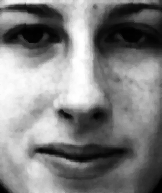

In [1032]:
show_face(test_face)

In [1033]:
n_mean_face

array([0.00561081, 0.00559553, 0.0056019 , ..., 0.00195606, 0.00196366,
       0.0020218 ], dtype=float32)

0.31046740504790526


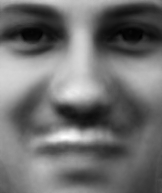

In [1034]:
reconstruct_face = reconstruct(test_face, n_U, n_mean_face, 5)
img = show_face(reconstruct_face)
print(MSE(test_face, reconstruct_face))
img

## k = 20

0.27838063903814636


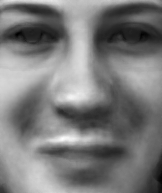

In [1035]:
reconstruct_face = reconstruct(test_face, n_U, n_mean_face, 20)
img = show_face(reconstruct_face)
print(MSE(test_face, reconstruct_face))
img

## k = 90

0.24262915594362688


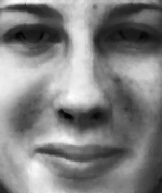

In [1036]:
reconstruct_face = reconstruct(test_face, n_U, n_mean_face, 90)
img = show_face(reconstruct_face)
print(MSE(test_face, reconstruct_face))
img

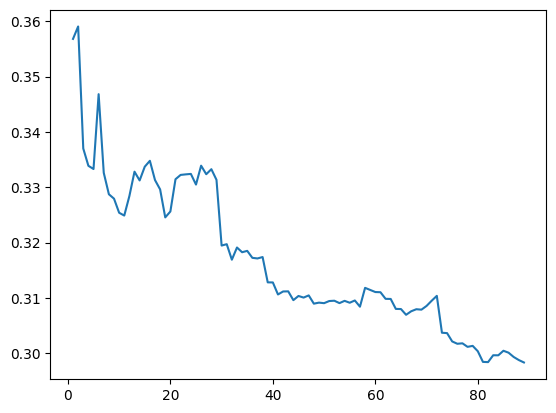

In [1222]:
x = []
mse = []
for i in range(1, 90):
    reconstruct_face = reconstruct(test_face, n_U, n_mean_face, i)
    x.append(i)
    mse.append(MSE(test_face, reconstruct_face))
    
plt.plot(x, mse)

# Reconstruct Smile Face with differnt k

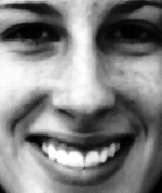

In [1038]:
test_face = smile[:,indexs[19]]
show_face(test_face)

## k = 10

0.2291562449438916


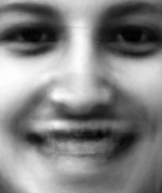

In [1039]:
reconstruct_face = reconstruct(test_face, s_U, s_mean_face, 10)
img = show_face(reconstruct_face)
print(MSE(test_face, reconstruct_face))
img

## k = 50

0.12016130395877647


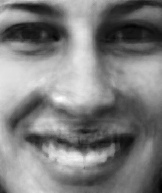

In [1040]:
reconstruct_face = reconstruct(test_face, s_U, s_mean_face, 50)
img = show_face(reconstruct_face)
print(MSE(test_face, reconstruct_face))
img

## k = 90

0.02006922016048979


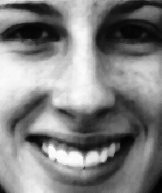

In [1041]:
reconstruct_face = reconstruct(test_face, s_U, s_mean_face, 90)
img = show_face(reconstruct_face)
print(MSE(test_face, reconstruct_face))
img

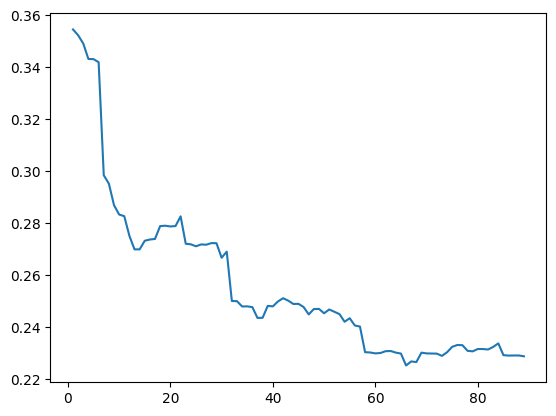

In [1223]:
x = []
mse = []
for i in range(1, 90):
    reconstruct_face = reconstruct(test_face, s_U, s_mean_face, i)
    x.append(i)
    mse.append(MSE(test_face, reconstruct_face))
    
plt.plot(x, mse)

# Experiments for remaining faces

In [1043]:
remaining_indexs = []
for i in range(neutral.shape[1]):
    if i not in indexs:
        remaining_indexs.append(i)

In [1044]:
len(remaining_indexs)

71

# Neutral Face

In [1092]:
test_face = neutral[:,remaining_indexs[19]]

## k = 10

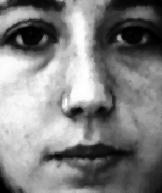

In [1093]:
show_face(test_face)

In [1094]:
n_mean_face

array([0.00561081, 0.00559553, 0.0056019 , ..., 0.00195606, 0.00196366,
       0.0020218 ], dtype=float32)

0.297842583736891


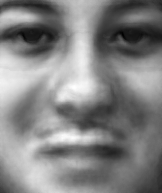

In [1095]:
reconstruct_face = reconstruct(test_face, n_U, n_mean_face, 10)
img = show_face(reconstruct_face)
print(MSE(test_face, reconstruct_face))
img

## k = 50

0.29659331809815803


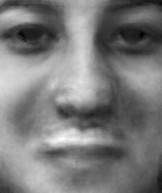

In [1096]:
reconstruct_face = reconstruct(test_face, n_U, n_mean_face, 50)
img = show_face(reconstruct_face)
print(MSE(test_face, reconstruct_face))
img

## k = 90

0.3016070535343774


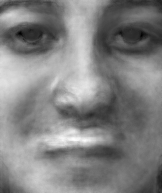

In [1097]:
reconstruct_face = reconstruct(test_face, n_U, n_mean_face, 90)
img = show_face(reconstruct_face)
print(MSE(test_face, reconstruct_face))
img

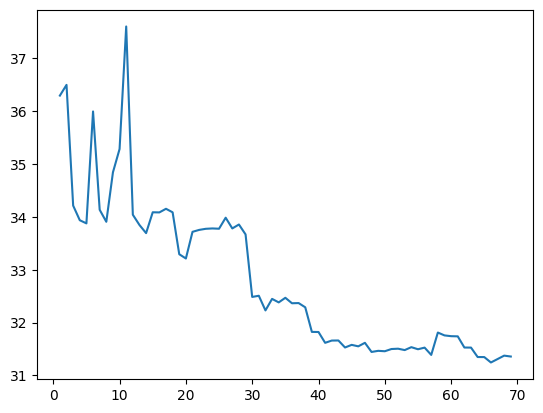

In [1212]:
x = []
mse = []
for i in range(1, 70):
    reconstruct_face = reconstruct(test_face, n_U, n_mean_face, i)
    x.append(i)
    mse.append(MSE(test_face, reconstruct_face))
    
plt.plot(x, mse)

## Smile face

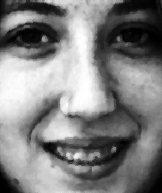

In [1099]:
test_face = smile[:,remaining_indexs[19]]
show_face(test_face)

## k = 10

0.2856964865656132


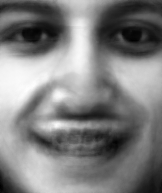

In [1100]:
reconstruct_face = reconstruct(test_face, s_U, s_mean_face, 10)
img = show_face(reconstruct_face)
print(MSE(test_face, reconstruct_face))
img

## k = 50

0.2422316700155367


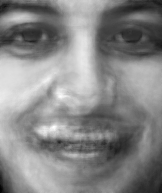

In [1101]:
reconstruct_face = reconstruct(test_face, s_U, s_mean_face, 50)
img = show_face(reconstruct_face)
print(MSE(test_face, reconstruct_face))
img

## k = 90

0.23432655178858128


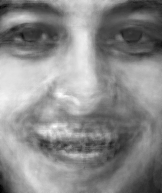

In [1102]:
reconstruct_face = reconstruct(test_face, s_U, s_mean_face, 90)
img = show_face(reconstruct_face)
print(MSE(test_face, reconstruct_face))
img

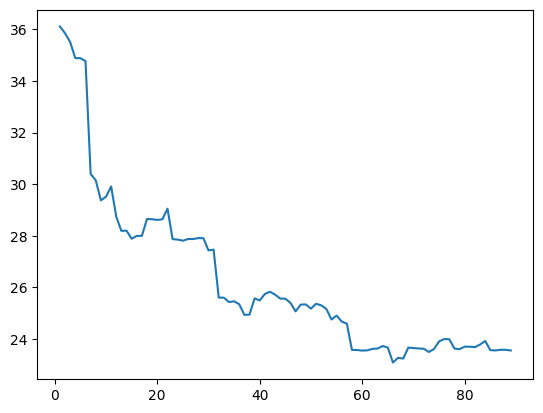

In [1213]:
x = []
mse = []
for i in range(1, 90):
    reconstruct_face = reconstruct(test_face, s_U, s_mean_face, i)
    x.append(i)
    mse.append(MSE(test_face, reconstruct_face))
    
plt.plot(x, mse)

# Facial Expression Classification

## Generate testing set

In [1185]:
test_indexs = np.random.choice(remaining_indexs, 60, replace=False)
test_neutral = neutral[:, test_indexs]
test_smile = smile[:, test_indexs]

In [1186]:
test_neutral.shape

(31266, 60)

In [1187]:
def classify_face(face, k=90):
    n_re_face = reconstruct(face, n_U, n_mean_face, k)
    s_re_face = reconstruct(face, s_U, s_mean_face, k)
    n_MSE = MSE(face, n_re_face)
    s_MSE = MSE(face, s_re_face)
    # print(n_MSE)
    # print(s_MSE)
    if n_MSE < s_MSE:
        return 1
    else:
        return 0

In [1188]:
face = test_neutral[:,30]
n_re_face = reconstruct(face, n_U, n_mean_face, 50)
s_re_face = reconstruct(face, s_U, s_mean_face, 50)

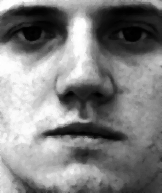

In [1189]:
show_face(face)

0.2654143610215644


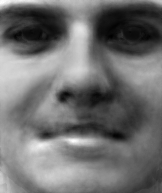

In [1190]:
print(MSE(face, n_re_face))
show_face(n_re_face)

0.1926946029570502


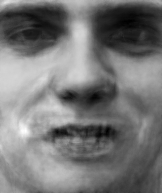

In [1191]:
print(MSE(face, s_re_face))
show_face(s_re_face)

In [1217]:
n_wrong_index = []
s_wrong_index = []

for i in range(test_neutral.shape[1]):
    d = classify_face(test_neutral[:,i], 20)
    if d == 0:
        n_wrong_index.append(i)
    
    d = classify_face(test_smile[:,i], 20)
    if d == 1:
        s_wrong_index.append(i)

In [1224]:
n_wrong_index

[0,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 57,
 58,
 59]

In [1219]:
len(s_wrong_index)

0

In [1220]:
1 - 57 / 120

0.525

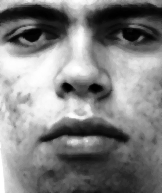

In [1227]:
show_face(test_neutral[:, 6])

In [1228]:
n_re_face = reconstruct(face, n_U, n_mean_face, 50)
s_re_face = reconstruct(face, s_U, s_mean_face, 50)

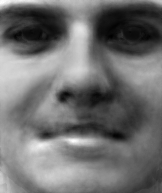

In [1229]:
show_face(n_re_face)

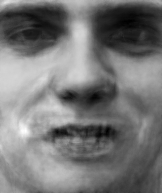

In [1230]:
show_face(s_re_face)